In [1]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from skimage.feature import graycomatrix, graycoprops
from scipy.stats import entropy
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay)
import seaborn as sns

## Define Resize Function

In [2]:
def resize(image, new_row, new_column):
    row, column = image.shape

    new_image = np.zeros((new_row, new_column), dtype=np.uint8)

    for i in range(new_row):
        for j in range(new_column):
            x = int(i * row / new_row)
            y = int(j * column / new_column)

            x = min(x, row - 1)
            y = min(y, column - 1)

            new_image[i, j] = image[x, y]
            
    return new_image

## Define Display Function

In [3]:
def display(data, labels, samples_per_label=5):
    unique_labels = np.unique(labels)
    num_unique_labels = len(unique_labels)

    plt.figure(figsize=(samples_per_label * 2, num_unique_labels * 2))

    for i, label in enumerate(unique_labels):
        indices = np.where(labels == label)[0]

        if len(indices) == 0:
            print(f"Tidak ada gambar ditemukan untuk label: {label}")
            continue

        selected_indices = indices[:samples_per_label]

        for j, idx in enumerate(selected_indices):
            plt.subplot(num_unique_labels, samples_per_label, i * samples_per_label + j + 1)
            plt.imshow(data[idx], cmap='gray')
            plt.axis('off')

            if j == 0:
                plt.title(f"Label: {label}")

    plt.tight_layout()
    plt.show()

## Data Loading

In [4]:
data = []
labels = []
file_name = []

for sub_folder in os.listdir("dataset\\"):
    sub_folder_files = os.listdir(os.path.join("dataset\\", sub_folder))
    for i, filename in enumerate(sub_folder_files):
        img_path = os.path.join("dataset\\", sub_folder, filename)
        img = cv.imread(img_path)
        if img is None:
            continue  # lewati file yang tidak bisa dibaca
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        img = resize(img, 128, 128)  # resize gambar

        data.append(img)
        labels.append(sub_folder)
        name = os.path.splitext(filename)[0]
        file_name.append(filename)

data = np.array(data)
labels = np.array(labels)

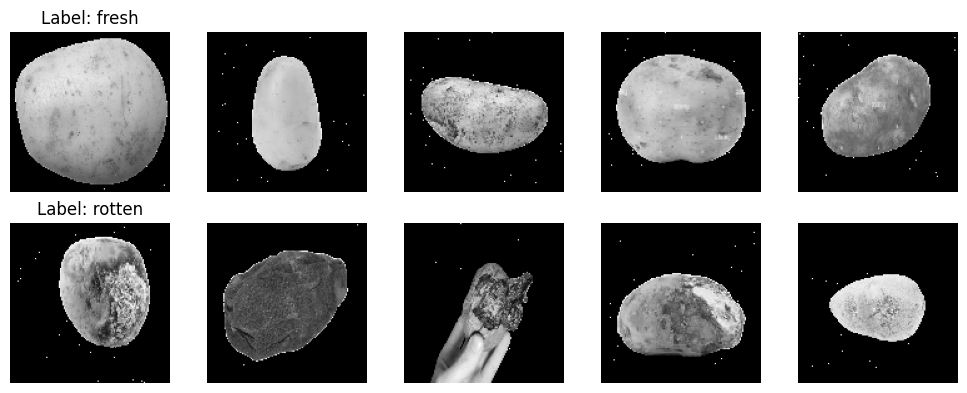

In [5]:
display(data, labels)

In [6]:
def glcm(image, derajat):
    if derajat == 0:
        angles = [0]
    elif derajat == 45:
        angles = [np.pi / 4]
    elif derajat == 90:
        angles = [np.pi / 2]
    elif derajat == 135:
        angles = [3 * np.pi / 4]
    else:
        raise ValueError("Invalid angle. It should be one of the following: 0, 45, 90, 135.")

    # mengembalikan matrix glcm dari image
    glcm = graycomatrix(image, [1], angles, 256, symmetric=True, normed=True)
    return glcm

In [7]:
def correlation(matriks):
	return graycoprops(matriks, 'correlation')[0, 0]

In [8]:
def dissimilarity(matriks):
    return graycoprops(matriks, 'dissimilarity')[0, 0]

In [9]:
def homogenity(matriks):
    return graycoprops(matriks, 'homogeneity')[0, 0]

In [10]:
def contrast(matriks):
    return graycoprops(matriks, 'contrast')[0, 0]

In [11]:
def ASM(matriks):
    return graycoprops(matriks, 'ASM')[0, 0]

In [12]:
def energy(matriks):
    return graycoprops(matriks, 'energy')[0, 0]

In [13]:
def entropyGlcm(matriks):
    return entropy(matriks.ravel())

In [14]:
Derajat0 = []
Derajat45 = []
Derajat90 = []
Derajat135 = []
for i in range(len(data)):
    D0 = glcm(data[i], 0)
    D45 = glcm(data[i], 45)
    D90 = glcm(data[i], 90)
    D135 = glcm(data[i], 135)
    Derajat0.append(D0)
    Derajat45.append(D45)
    Derajat90.append(D90)
    Derajat135.append(D135)

In [15]:
Kontras0, Kontras45, Kontras90, Kontras135 = [], [], [], []
dissimilarity0, dissimilarity45, dissimilarity90, dissimilarity135 =  [], [], [], []
homogenity0, homogenity45, homogenity90, homogenity135 = [], [], [], []
entropy0, entropy45, entropy90, entropy135 =  [], [], [], []
ASM0, ASM45, ASM90, ASM135 =  [], [], [], []
energy0, energy45, energy90, energy135 =  [], [], [], []
correlation0, correlation45, correlation90, correlation135 = [], [], [], []

In [16]:
for i in range(len(data)):
    C0 = correlation(Derajat0[i])
    correlation0.append(C0)
    C45 = correlation(Derajat45[i])
    correlation45.append(C45)
    C90 = correlation(Derajat90[i])
    correlation90.append(C90)
    C135 = correlation(Derajat135[i])
    correlation135.append(C135)

In [17]:
for i in range(len(data)):
    K0 = contrast(Derajat0[i])
    K45 = contrast(Derajat45[i])
    K90 = contrast(Derajat90[i])
    K135 = contrast(Derajat135[i])
    Kontras0.append(K0)
    Kontras45.append(K45)
    Kontras90.append(K90)
    Kontras135.append(K135)

In [18]:
for i in range(len(data)):
    Dis0 = dissimilarity(Derajat0[i])
    Dis45 = dissimilarity(Derajat45[i])
    Dis90 = dissimilarity(Derajat90[i])
    Dis135 = dissimilarity(Derajat135[i])
    dissimilarity0.append(Dis0)
    dissimilarity45.append(Dis45)
    dissimilarity90.append(Dis90)
    dissimilarity135.append(Dis135)

In [19]:
for i in range(len(data)):
    H0 = homogenity(Derajat0[i])
    H45 = homogenity(Derajat45[i])
    H90 = homogenity(Derajat90[i])
    H135 = homogenity(Derajat135[i])
    homogenity0.append(H0)
    homogenity45.append(H45)
    homogenity90.append(H90)
    homogenity135.append(H135)

In [20]:
for i in range(len(data)):
    E0 = entropyGlcm(Derajat0[i])
    E45 = entropyGlcm(Derajat45[i])
    E90 = entropyGlcm(Derajat90[i])
    E135 = entropyGlcm(Derajat135[i])
    entropy0.append(E0)
    entropy45.append(E45)
    entropy90.append(E90)
    entropy135.append(E135)

In [21]:
for i in range(len(data)):
    A0 = ASM(Derajat0[i])
    A45 = ASM(Derajat45[i])
    A90 = ASM(Derajat90[i])
    A135 = ASM(Derajat135[i])
    ASM0.append(A0)
    ASM45.append(A45)
    ASM90.append(A90)
    ASM135.append(A135)

In [22]:
for i in range(len(data)):
    ER0 = energy(Derajat0[i])
    ER45 = energy(Derajat45[i])
    ER90 = energy(Derajat90[i])
    ER135 = energy(Derajat135[i])
    energy0.append(ER0)
    energy45.append(ER45)
    energy90.append(ER90)
    energy135.append(ER135)

In [23]:
dataTable = {'Filename': file_name, 'Label': labels,
        'Contrast0': Kontras0, 'Contrast45': Kontras45, 'Contrast90': Kontras90, 'Contrast135': Kontras135,
        'Homogeneity0': homogenity0, 'Homogeneity45': homogenity45, 'Homogeneity90': homogenity90, 'Homogeneity135': homogenity135,
        'Dissimilarity0': dissimilarity0, 'Dissimilarity45': dissimilarity45, 'Dissimilarity90': dissimilarity90, 'Dissimilarity135': dissimilarity135,
        'Entropy0': entropy0, 'Entropy45': entropy45, 'Entropy90': entropy90, 'Entropy135': entropy135,
        'ASM0': ASM0, 'ASM45': ASM45, 'ASM90': ASM90, 'ASM135': ASM135,
        'Energy0': energy0, 'Energy45': energy45, 'Energy90': energy90, 'Energy135': energy135,
        'Correlation0': correlation0, 'Correlation45': correlation45, 'Correlation90': correlation90, 'Correlation135': correlation135,
        }
df = pd.DataFrame(dataTable)
df.to_csv('hasil_ekstraksi_1.csv', index=False)

hasilEkstrak = pd.read_csv('hasil_ekstraksi_1.csv')
hasilEkstrak

,Filename,Label,Contrast0,Contrast45,Contrast90,Contrast135,Homogeneity0,Homogeneity45,Homogeneity90,Homogeneity135,...,ASM90,ASM135,Energy0,Energy45,Energy90,Energy135,Correlation0,Correlation45,Correlation90,Correlation135
0,freshPotato (1).png,fresh,543.784941,758.287681,560.725025,763.334367,0.425507,0.398104,0.429589,0.407430,...,0.083959,0.078767,0.290035,0.280894,0.289757,0.280654,0.962692,0.947543,0.961530,0.947193
1,freshPotato (10).png,fresh,715.667077,777.592659,471.860851,815.600347,0.829331,0.810909,0.852645,0.813973,...,0.548538,0.540215,0.738377,0.735298,0.740633,0.734993,0.950820,0.946841,0.967574,0.944243
2,freshPotato (11).png,fresh,664.777867,858.544485,805.070312,931.135346,0.723062,0.711996,0.716000,0.712547,...,0.486660,0.481190,0.700010,0.694794,0.697610,0.693679,0.944638,0.928830,0.932940,0.922812
3,freshPotato (12).png,fresh,666.067913,860.841218,673.514026,863.274103,0.640796,0.602631,0.626870,0.605085,...,0.289399,0.282967,0.538711,0.532068,0.537959,0.531947,0.959077,0.947185,0.958616,0.947036
4,freshPotato (13).png,fresh,606.901636,785.376217,600.751353,673.401389,0.702605,0.687793,0.708003,0.692897,...,0.436957,0.431959,0.661270,0.655190,0.661027,0.657236,0.936896,0.918682,0.937552,0.930276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,rottenPotato (73).png,rotten,788.092766,923.035774,810.257382,1236.503565,0.653395,0.643732,0.653203,0.637825,...,0.372350,0.364554,0.607806,0.606389,0.610205,0.603783,0.926687,0.914278,0.924442,0.885166
146,rottenPotato (74).png,rotten,493.496001,647.764958,526.971703,674.782628,0.622441,0.614448,0.619690,0.614117,...,0.365089,0.361556,0.607117,0.600365,0.604226,0.601295,0.941286,0.923215,0.937349,0.920012
147,rottenPotato (75).png,rotten,244.912402,307.495443,201.984621,321.247194,0.644671,0.630887,0.644457,0.633922,...,0.373024,0.367857,0.612232,0.605458,0.610757,0.606512,0.954541,0.943140,0.962509,0.940597
148,rottenPotato (8).png,rotten,599.280020,704.161200,533.159941,654.939178,0.718106,0.711476,0.721224,0.712720,...,0.488116,0.481960,0.698467,0.693428,0.698653,0.694233,0.913640,0.899027,0.923168,0.906085


<Axes: >

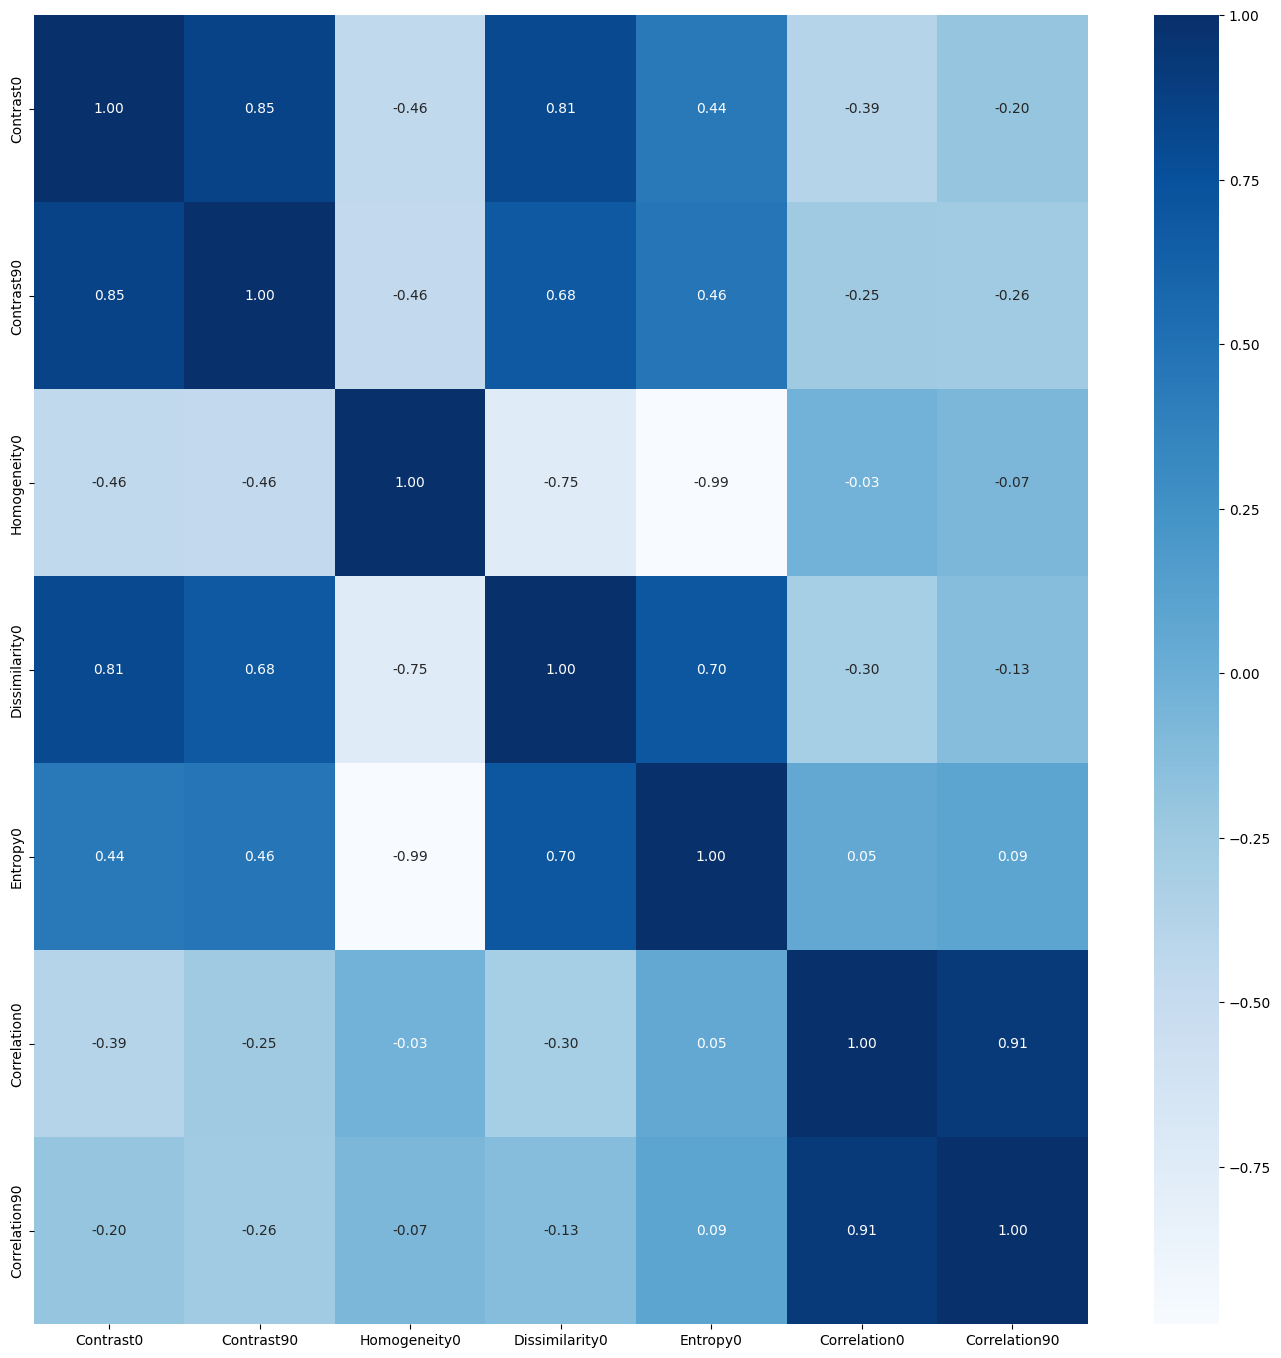

In [24]:
# Menghitung korelasi
correlation = hasilEkstrak.drop(columns=['Label','Filename']).corr()

# Menyaring fitur yang memiliki korelasi absolut lebih dari 0.95 dengan label
threshold = 0.95 # atur threshold ini untuk menentukan seberapa besar korelasi yang ingin disaring
selectionFeature = []
columns = np.full((correlation.shape[0],), True, dtype=bool)
for i in range(correlation.shape[0]):
	for j in range(i+1, correlation.shape[0]):
		if correlation.iloc[i,j] >= threshold:
			if columns[j]:
				columns[j] = False
select = hasilEkstrak.drop(columns=['Label','Filename']).columns[columns]
x_new = hasilEkstrak[select]
x_new
y = hasilEkstrak['Label']
plt.figure(figsize=(17,17))
sns.heatmap(x_new.corr(), annot=True, cmap='Blues', fmt=".2f")

In [25]:
# ubah bagian test_size sesuai kebutuhan
# 0.3 = 30% data untuk testing (train/test 70/30)
# 0.2 = 20% data untuk testing (train/test 80/20)
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(105, 7)
(45, 7)


In [26]:
X_test = (X_test - X_train.mean()) / X_train.std()
X_train = (X_train - X_train.mean()) / X_train.std()

In [27]:
def generateClassificationReport(y_true, y_pred):
	print(classification_report(y_true, y_pred))
	print(confusion_matrix(y_true, y_pred))
	print('Accuracy:', accuracy_score(y_true, y_pred))

# Define classifiers
rf = RandomForestClassifier(n_estimators=5, random_state=42)
svm = SVC(kernel='rbf', random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

In [28]:
# Train Random Forest Classifier
rf.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("------Training Set------")
y_pred = rf.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = rf.predict(X_test)
generateClassificationReport( y_test, y_pred)

------Training Set------
              precision    recall  f1-score   support

       fresh       1.00      0.96      0.98        48
      rotten       0.97      1.00      0.98        57

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105

[[46  2]
 [ 0 57]]
Accuracy: 0.9809523809523809

------Testing Set------
              precision    recall  f1-score   support

       fresh       0.95      0.70      0.81        27
      rotten       0.68      0.94      0.79        18

    accuracy                           0.80        45
   macro avg       0.81      0.82      0.80        45
weighted avg       0.84      0.80      0.80        45

[[19  8]
 [ 1 17]]
Accuracy: 0.8


In [29]:
# Train SVM Classifier
svm.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("\n------Training Set------")
y_pred = svm.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = svm.predict(X_test)
generateClassificationReport( y_test, y_pred)


------Training Set------
              precision    recall  f1-score   support

       fresh       0.85      0.81      0.83        48
      rotten       0.85      0.88      0.86        57

    accuracy                           0.85       105
   macro avg       0.85      0.84      0.85       105
weighted avg       0.85      0.85      0.85       105

[[39  9]
 [ 7 50]]
Accuracy: 0.8476190476190476

------Testing Set------
              precision    recall  f1-score   support

       fresh       0.92      0.85      0.88        27
      rotten       0.80      0.89      0.84        18

    accuracy                           0.87        45
   macro avg       0.86      0.87      0.86        45
weighted avg       0.87      0.87      0.87        45

[[23  4]
 [ 2 16]]
Accuracy: 0.8666666666666667


In [30]:
# Train KNN Classifier
knn.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("\n------Training Set------")
y_pred = knn.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = knn.predict(X_test)
generateClassificationReport( y_test, y_pred)


------Training Set------
              precision    recall  f1-score   support

       fresh       0.84      0.77      0.80        48
      rotten       0.82      0.88      0.85        57

    accuracy                           0.83       105
   macro avg       0.83      0.82      0.83       105
weighted avg       0.83      0.83      0.83       105

[[37 11]
 [ 7 50]]
Accuracy: 0.8285714285714286

------Testing Set------
              precision    recall  f1-score   support

       fresh       0.92      0.81      0.86        27
      rotten       0.76      0.89      0.82        18

    accuracy                           0.84        45
   macro avg       0.84      0.85      0.84        45
weighted avg       0.85      0.84      0.85        45

[[22  5]
 [ 2 16]]
Accuracy: 0.8444444444444444


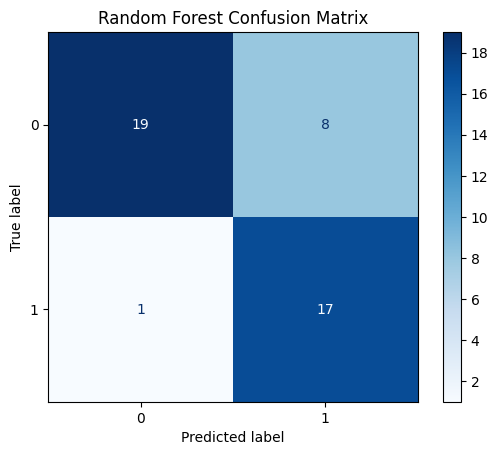

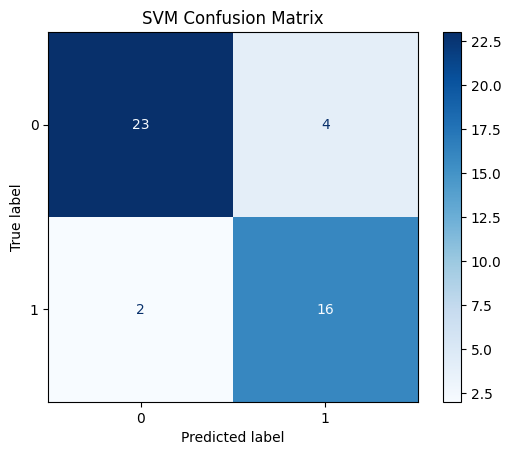

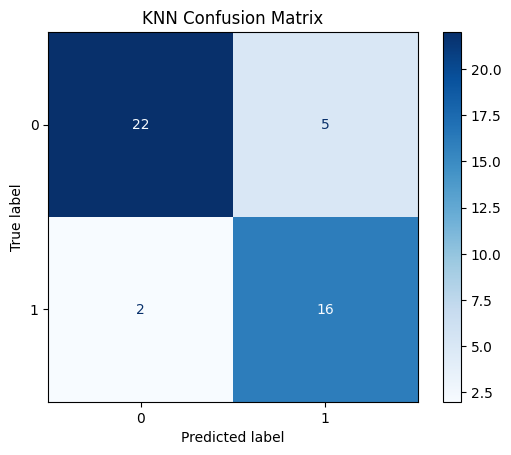

In [31]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, rf.predict(X_test), "Random Forest Confusion Matrix")
# Plot confusion matrix for SVM
plot_confusion_matrix(y_test, svm.predict(X_test), "SVM Confusion Matrix")
# Plot confusion matrix for KNN
plot_confusion_matrix(y_test, knn.predict(X_test), "KNN Confusion Matrix")

## 